# Introduction to the Data Sets

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

The data sets provided are hosting within an Amazon Web Services S3 bucket

In [19]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)
fs.ls('esipfed/cdi-workshop')

['esipfed/cdi-workshop/fully_conv_semseg',
 'esipfed/cdi-workshop/imrecog_data',
 'esipfed/cdi-workshop/semseg_data']

We're going to use this root file structure a lot, so let's define a variable we can call repeatedly

In [20]:
root = 'esipfed/cdi-workshop'

## Looking at file structure

There are three major subdirectories:
* 'imrecog_data': contains example data sets for image recognition
* 'semseg_data': contains example data sets for semantic segmentation
* 'fully_conv_semseg': contains example data sets for fully convolutional semantic segmentation

In [21]:
fs.ls(root+'/imrecog_data/EuroSAT')

['esipfed/cdi-workshop/imrecog_data/EuroSAT/AnnualCrop',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/Forest',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/HerbaceousVegetation',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/Highway',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/Industrial',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/Pasture',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/PermanentCrop',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/Residential',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/River',
 'esipfed/cdi-workshop/imrecog_data/EuroSAT/SeaLake']

In [22]:
len(fs.ls(root+'/semseg_data/gc/train'))

16

In [23]:
fs.ls(root+'/imrecog_data/NWPU-RESISC45/test/')

['esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/airport',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/basketball_court',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/beach',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/bridge',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/chaparral',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/church',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/circular_farmland',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/cloud',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/commercial_area',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/dense_residential',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/desert',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/forest',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45

## Reading and displaying imagery

In [24]:
from imageio import imread
import matplotlib.pyplot as plt

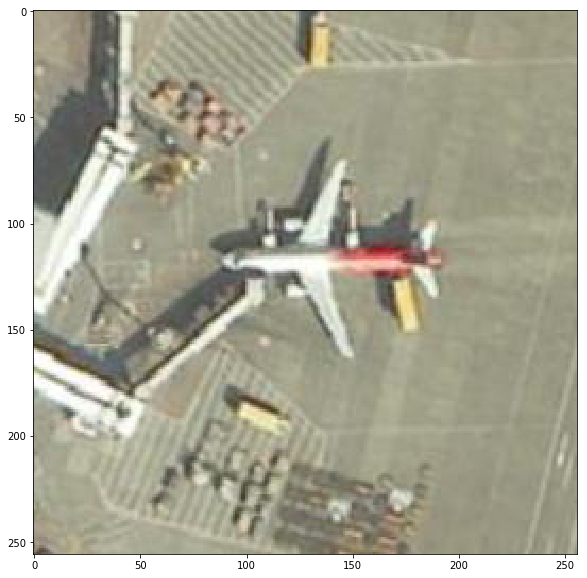

In [25]:
with fs.open(root+'/imrecog_data/NWPU-RESISC45/test/airplane/airplane_700.jpg', 'rb') as f:
    image = imread(f, 'jpg')
    plt.figure(0, figsize=(10,10))
    plt.imshow(image);

In [26]:
fs.ls(root+'/imrecog_data/NWPU-RESISC45/test')

['esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/airport',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/basketball_court',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/beach',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/bridge',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/chaparral',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/church',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/circular_farmland',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/cloud',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/commercial_area',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/dense_residential',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/desert',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45/test/forest',
 'esipfed/cdi-workshop/imrecog_data/NWPU-RESISC45

In [27]:
names = [f for f in fs.ls(root+'/imrecog_data/NWPU-RESISC45/test/baseball_diamond') if f.endswith('.jpg')]
names = names[:10]

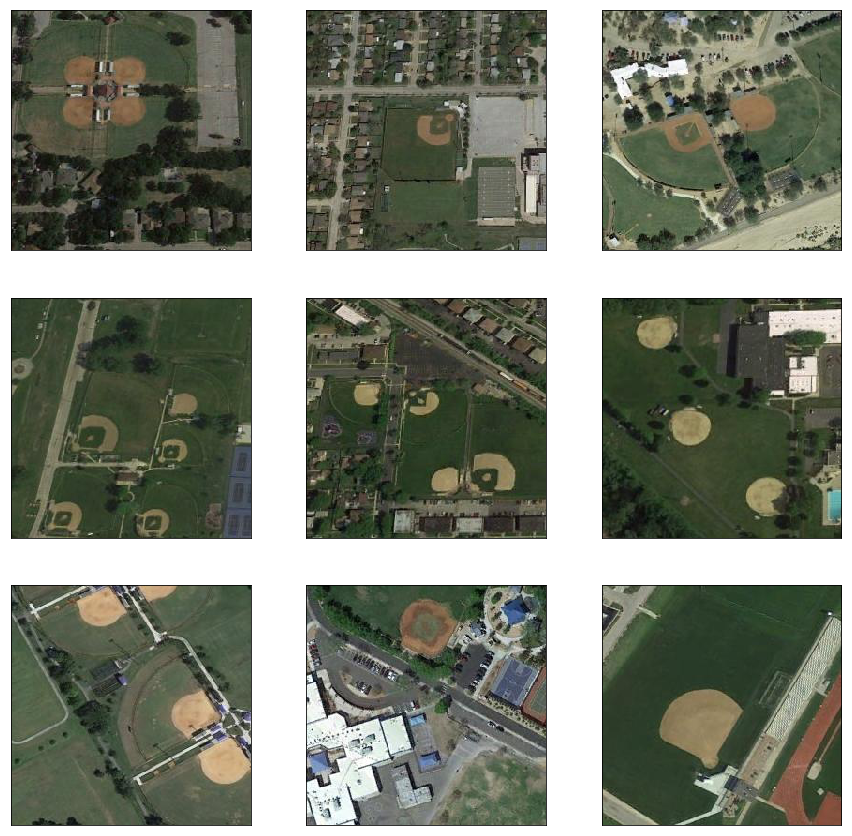

In [28]:
fig, ax = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, axi in enumerate(ax.flat):
    with fs.open(names[i], 'rb') as f:
        image = imread(f, 'jpg')
    axi.imshow(image)
    axi.set(xticks=[], yticks=[])

## Read Labels

'Labels' files are text files that contain class labels. One label per row

In [29]:
fs.ls(root+'/semseg_data/gc/labels')

['esipfed/cdi-workshop/semseg_data/gc/labels/labels.txt']

In [30]:
with fs.open(root+'/semseg_data/gc/labels/labels.txt', 'rb') as f:
      labels = f.readlines()

labels = [x.strip() for x in labels] 
print(labels)
print(labels[0].decode())

[b'rock', b'sand', b'veg', b'water']
rock


## Read binary data files

We're using matlab's .mat format to store data from semantic segmentations. Sounds a bit weird, I know, but it is a fairly portable and space efficient format. And it helps matlab users out

In [31]:
from scipy.io import loadmat

In [32]:
with fs.open(root+'/semseg_data/ontario/test/A2014862_geotag_mres.mat') as f:
    dat = loadmat(f)

In [33]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'sparse', 'preds', 'class'])